## Clustering on The Lion King Movie Reviews

In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# To maintain the same standard in all the plots
label_font = {'fontname':'sans serif','fontsize':15} 
title_font = {'fontname':'sans serif','fontsize':20}

In [148]:
# Final all reviews dataset with preprocessed reviews and sentiments without class imbalance. 
data1 = pd.read_csv('final_allreviews_5050.csv')

In [149]:
data1.sentiment.value_counts(normalize=True)

0    0.533333
1    0.466667
Name: sentiment, dtype: float64

In [150]:
# Dropping Primary key
data1.drop('primary_key',axis=1,inplace=True)

In [135]:
X_train = data1['modified_review']

In [151]:
print(X_train.shape)

(3000,)


## TFIDF and COUNT Vec on modified reviews

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,max_features=1000,stop_words='english')
count_vectorizer = CountVectorizer(stop_words='english',lowercase=True, strip_accents='unicode',decode_error='ignore')

In [152]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) #TFIDF
X_train_cv = count_vectorizer.fit_transform(X_train) #Count Vec

### KMeans Clustering on TFIDF reviews and Count Vec reviews

#### TFIDF

In [153]:
## Elbow curve to check the suitable number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1234,max_iter = 1000)
    kmeanModel.fit(X_train_tfidf)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

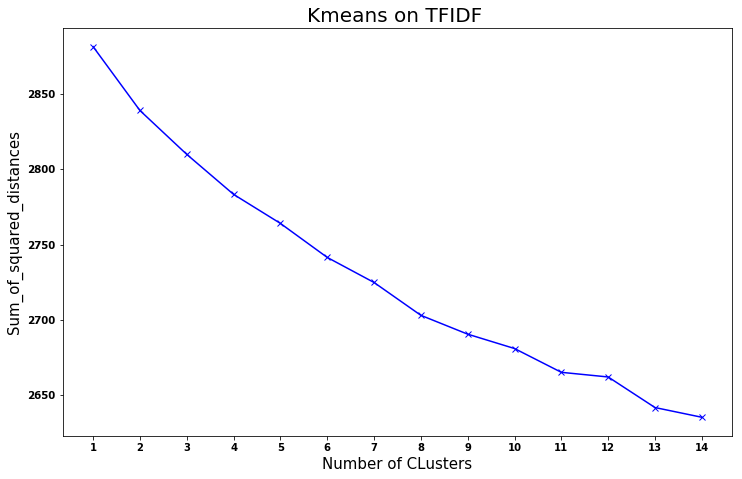

In [169]:
plt.figure(figsize=(12,7.5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.title('Kmeans on TFIDF ',**title_font)
plt.xticks(range(1,15),rotation=0,fontname='sans serif')
plt.xlabel('Number of Clusters',**label_font)
plt.ylabel('Sum_of_squared_distances',**label_font)
plt.show()

### Observation
- It is ideal to form 4 or 5 clusters.

#### Count Vec

In [170]:
## Elbow curve to check the suitable number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1234,max_iter = 1000)
    kmeanModel.fit(X_train_cv)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

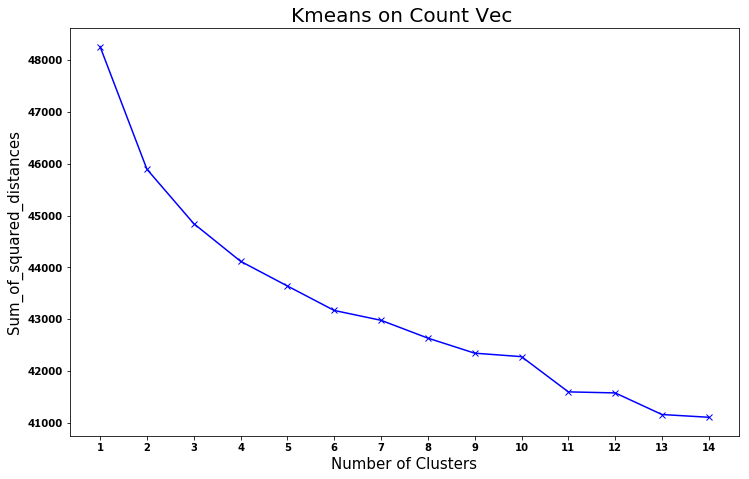

In [173]:
plt.figure(figsize=(12,7.5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.title('Kmeans on Count Vec ',**title_font)
plt.xticks(range(1,15),rotation=0,fontname='sans serif')
plt.xlabel('Number of Clusters',**label_font)
plt.ylabel('Sum_of_squared_distances',**label_font)
plt.show()

### Observation
- It is ideal to form 4 or 5 clusters.

## Predicting labels on TFIDF vectors using Kmeans

In [172]:
## Actual number of positive and negative reviews present in our data.
data1.sentiment.value_counts()

0    1600
1    1400
Name: sentiment, dtype: int64

In [178]:
km = KMeans(2)

km.fit(X_train_tfidf)

labels = km.predict(X_train_tfidf)
print('Distribution of Clusters using Kmeans of TFIDF vectors:')
print(pd.Series(labels).value_counts())

Distribution of Clusters using Kmeans of TFIDF vectors:
1    2683
0     317
dtype: int64


In [181]:
km = KMeans(2)

km.fit(X_train_cv)

labels = km.predict(X_train_cv)
print('Distribution of Clusters using Kmeans of Count Vec vectors:')
pd.Series(labels).value_counts()

Distribution of Clusters using Kmeans of Count Vec vectors:


1    2762
0     238
dtype: int64

## Agglomerative Clustering

In [85]:
from sklearn.cluster import AgglomerativeClustering

#### TFIDF

In [221]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
labels = cluster.fit_predict(X_train_tfidf.todense())
print('Distribution of clusters using agglomerative clustering:')
print('Using average linkage:')
print(pd.Series(labels).value_counts())

cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels = cluster.fit_predict(X_train_tfidf.todense())
print('Using ward linkage:')
print(pd.Series(labels).value_counts())

cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels = cluster.fit_predict(X_train_tfidf.todense())
print('Using complete linkage:')
print(pd.Series(labels).value_counts(normalize=True))

Distribution of clusters using agglomerative clustering:
Using average linkage:
0    2995
1       5
dtype: int64
Using ward linkage:
0    2956
1      44
dtype: int64
Using complete linkage:
0    0.726
1    0.274
dtype: float64


#### Count Vec

In [184]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
labels = cluster.fit_predict(X_train_cv.todense())
print('Distribution of clusters using agglomerative clustering:')
print('Using average linkage:')
print(pd.Series(labels).value_counts())

cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels = cluster.fit_predict(X_train_cv.todense())
print('Using ward linkage:')
print(pd.Series(labels).value_counts())

cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels = cluster.fit_predict(X_train_cv.todense())
print('Using complete linkage:')
print(pd.Series(labels).value_counts())

Distribution of clusters using agglomerative clustering:
Using average linkage:
0    2999
1       1
dtype: int64
Using ward linkage:
0    2946
1      54
dtype: int64
Using complete linkage:
1    2996
0       4
dtype: int64


### Observations
- TFIDF vectorized reviews are giving better clustering results.
- So we will use only TFIDF vectors for PCA and SVD

## PCA and Truncated SVD

Since clustering is a distance based method. It suffers from curse of dimentionality. We will reduce the dimensions using PCA and truncated SVD.

### PCA

In [113]:
from sklearn.decomposition import PCA

In [126]:
pca = PCA(.90) #We are retaining 90% of variation in our data

In [185]:
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf.todense())
X_train_tfidf_pca.shape

(3000, 497)

In [199]:
km = KMeans(2)

km.fit(X_train_tfidf_pca)

labels = km.predict(X_train_tfidf_pca)
print('Distribution of clusters formed using kmeans after PCA:')
pd.Series(labels).value_counts()

Distribution of clusters formed using kmeans after PCA:


1    2683
0     317
dtype: int64

In [192]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels = cluster.fit_predict(X_train_tfidf_pca)
print('Distribution of clusters formed using AgglomerativeClustering after PCA:')
print(pd.Series(labels).value_counts())

Distribution of clusters formed using AgglomerativeClustering after PCA:
0    2941
1      59
dtype: int64


### SVD

In [215]:
from sklearn.decomposition import TruncatedSVD
n_components = 200
svd_model = TruncatedSVD(n_components=n_components,
                         algorithm='randomized',
                         n_iter=20, random_state=1234)

In [216]:
X_train_tfidf_svd = svd_model.fit_transform(X_train_tfidf)

In [217]:
km = KMeans(2)

km.fit(X_train_tfidf_svd)

labels = km.predict(X_train_tfidf_svd)
print('Distribution of clusters formed using kmeans after SVD:')
pd.Series(labels).value_counts()

Distribution of clusters formed using kmeans after SVD:


0    2683
1     317
dtype: int64

In [220]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels = cluster.fit_predict(X_train_tfidf_svd)
print('Distribution of clusters formed using AgglomerativeClustering after SVD:')
print(pd.Series(labels).value_counts(normalize = True))

Distribution of clusters formed using AgglomerativeClustering after SVD:
0    0.755667
1    0.244333
dtype: float64


### Observations:
- Agglomerative clustering using ward linkage on TFIDF vectorized reviews s given better cluster results.

## Report
- Clustering on reviews is not very accurate as there are various types of sentiments.
- So it is ideal to form 4 or 5 clusters. We can observe this based on the elbow curves drawn above.
- We can have more precise sentiments like very positive, positive, neutral, negative, very negative.
- For 2 clusters if correct classification is more important than we can go with AgglomerativeClustering with complete linkage.
  It gives the ratio of 27%(cluster1):73%(cluster2).
- For 2 clusters if memory and speed is more important than we can go with AgglomerativeClustering with ward linkage. After performing SVD with 200 components.
  It gives the ratio of 24%(cluster1):76%(cluster2).